# 安徽安庆市项目`WRF-CMAQ`模拟分析
## 模拟结果分析：*`Process Analysis`*

---
*@author: Evan*\
*@date: 2023-05-09*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../src/')
import ModelEvaLib as me

## 读取数据

取地面1-4层为L1，5-19层为L2

In [5]:
pa=xr.open_dataset('F:/Data/case_anqing/April/April_PA1.nc')

HADV_L1 = np.mean(pa.HADV_O3[:,:4,:,:],1)
ZADV_L1 = np.mean(pa.ZADV_O3[:,:4,:,:],1)
HDIF_L1 = np.mean(pa.HDIF_O3[:,:4,:,:],1)
VDIF_L1 = np.mean(pa.VDIF_O3[:,:4,:,:],1)
DDEP_L1 = np.mean(pa.DDEP_O3[:,:4,:,:],1)
CHEM_L1 = np.mean(pa.CHEM_O3[:,:4,:,:],1)

HADV_L2 = np.mean(pa.HADV_O3[:,4:19,:,:],1)
ZADV_L2 = np.mean(pa.ZADV_O3[:,4:19,:,:],1)
HDIF_L2 = np.mean(pa.HDIF_O3[:,4:19,:,:],1)
VDIF_L2 = np.mean(pa.VDIF_O3[:,4:19,:,:],1)
DDEP_L2 = np.mean(pa.DDEP_O3[:,4:19,:,:],1)
CHEM_L2 = np.mean(pa.CHEM_O3[:,4:19,:,:],1)

HADV_L1.shape

(720, 138, 135)

In [6]:
import geopandas as gpd
shpurban = 'F:/Data/case_anqing/shapefile/Anqing_urban/urban.shp'
shp = gpd.read_file(shpurban)
for i in range(np.size(pa.latitude,0)):
    for j in range(np.size(pa.latitude,1)):
        if me.polygon_to_mask(shp.geometry[0],pa.longitude[i,j],pa.latitude[i,j])==False:
            HADV_L1[:,i,j] = np.nan
            ZADV_L1[:,i,j] = np.nan
            HDIF_L1[:,i,j] = np.nan
            VDIF_L1[:,i,j] = np.nan
            DDEP_L1[:,i,j] = np.nan
            CHEM_L1[:,i,j] = np.nan
                        
            HADV_L2[:,i,j] = np.nan
            ZADV_L2[:,i,j] = np.nan
            HDIF_L2[:,i,j] = np.nan
            VDIF_L2[:,i,j] = np.nan
            DDEP_L2[:,i,j] = np.nan
            CHEM_L2[:,i,j] = np.nan
            
hadv_L1 = np.nanmean(np.nanmean(HADV_L1,1),1)
zadv_L1 = np.nanmean(np.nanmean(ZADV_L1,1),1)
hdif_L1 = np.nanmean(np.nanmean(HDIF_L1,1),1)
vdif_L1 = np.nanmean(np.nanmean(VDIF_L1,1),1)
ddep_L1 = np.nanmean(np.nanmean(DDEP_L1,1),1)
chem_L1 = np.nanmean(np.nanmean(CHEM_L1,1),1)

hadv_L2 = np.nanmean(np.nanmean(HADV_L2,1),1)
zadv_L2 = np.nanmean(np.nanmean(ZADV_L2,1),1)
hdif_L2 = np.nanmean(np.nanmean(HDIF_L2,1),1)
vdif_L2 = np.nanmean(np.nanmean(VDIF_L2,1),1)
ddep_L2 = np.nanmean(np.nanmean(DDEP_L2,1),1)
chem_L2 = np.nanmean(np.nanmean(CHEM_L2,1),1)

hadv_L1.shape

(720,)

## 绘图

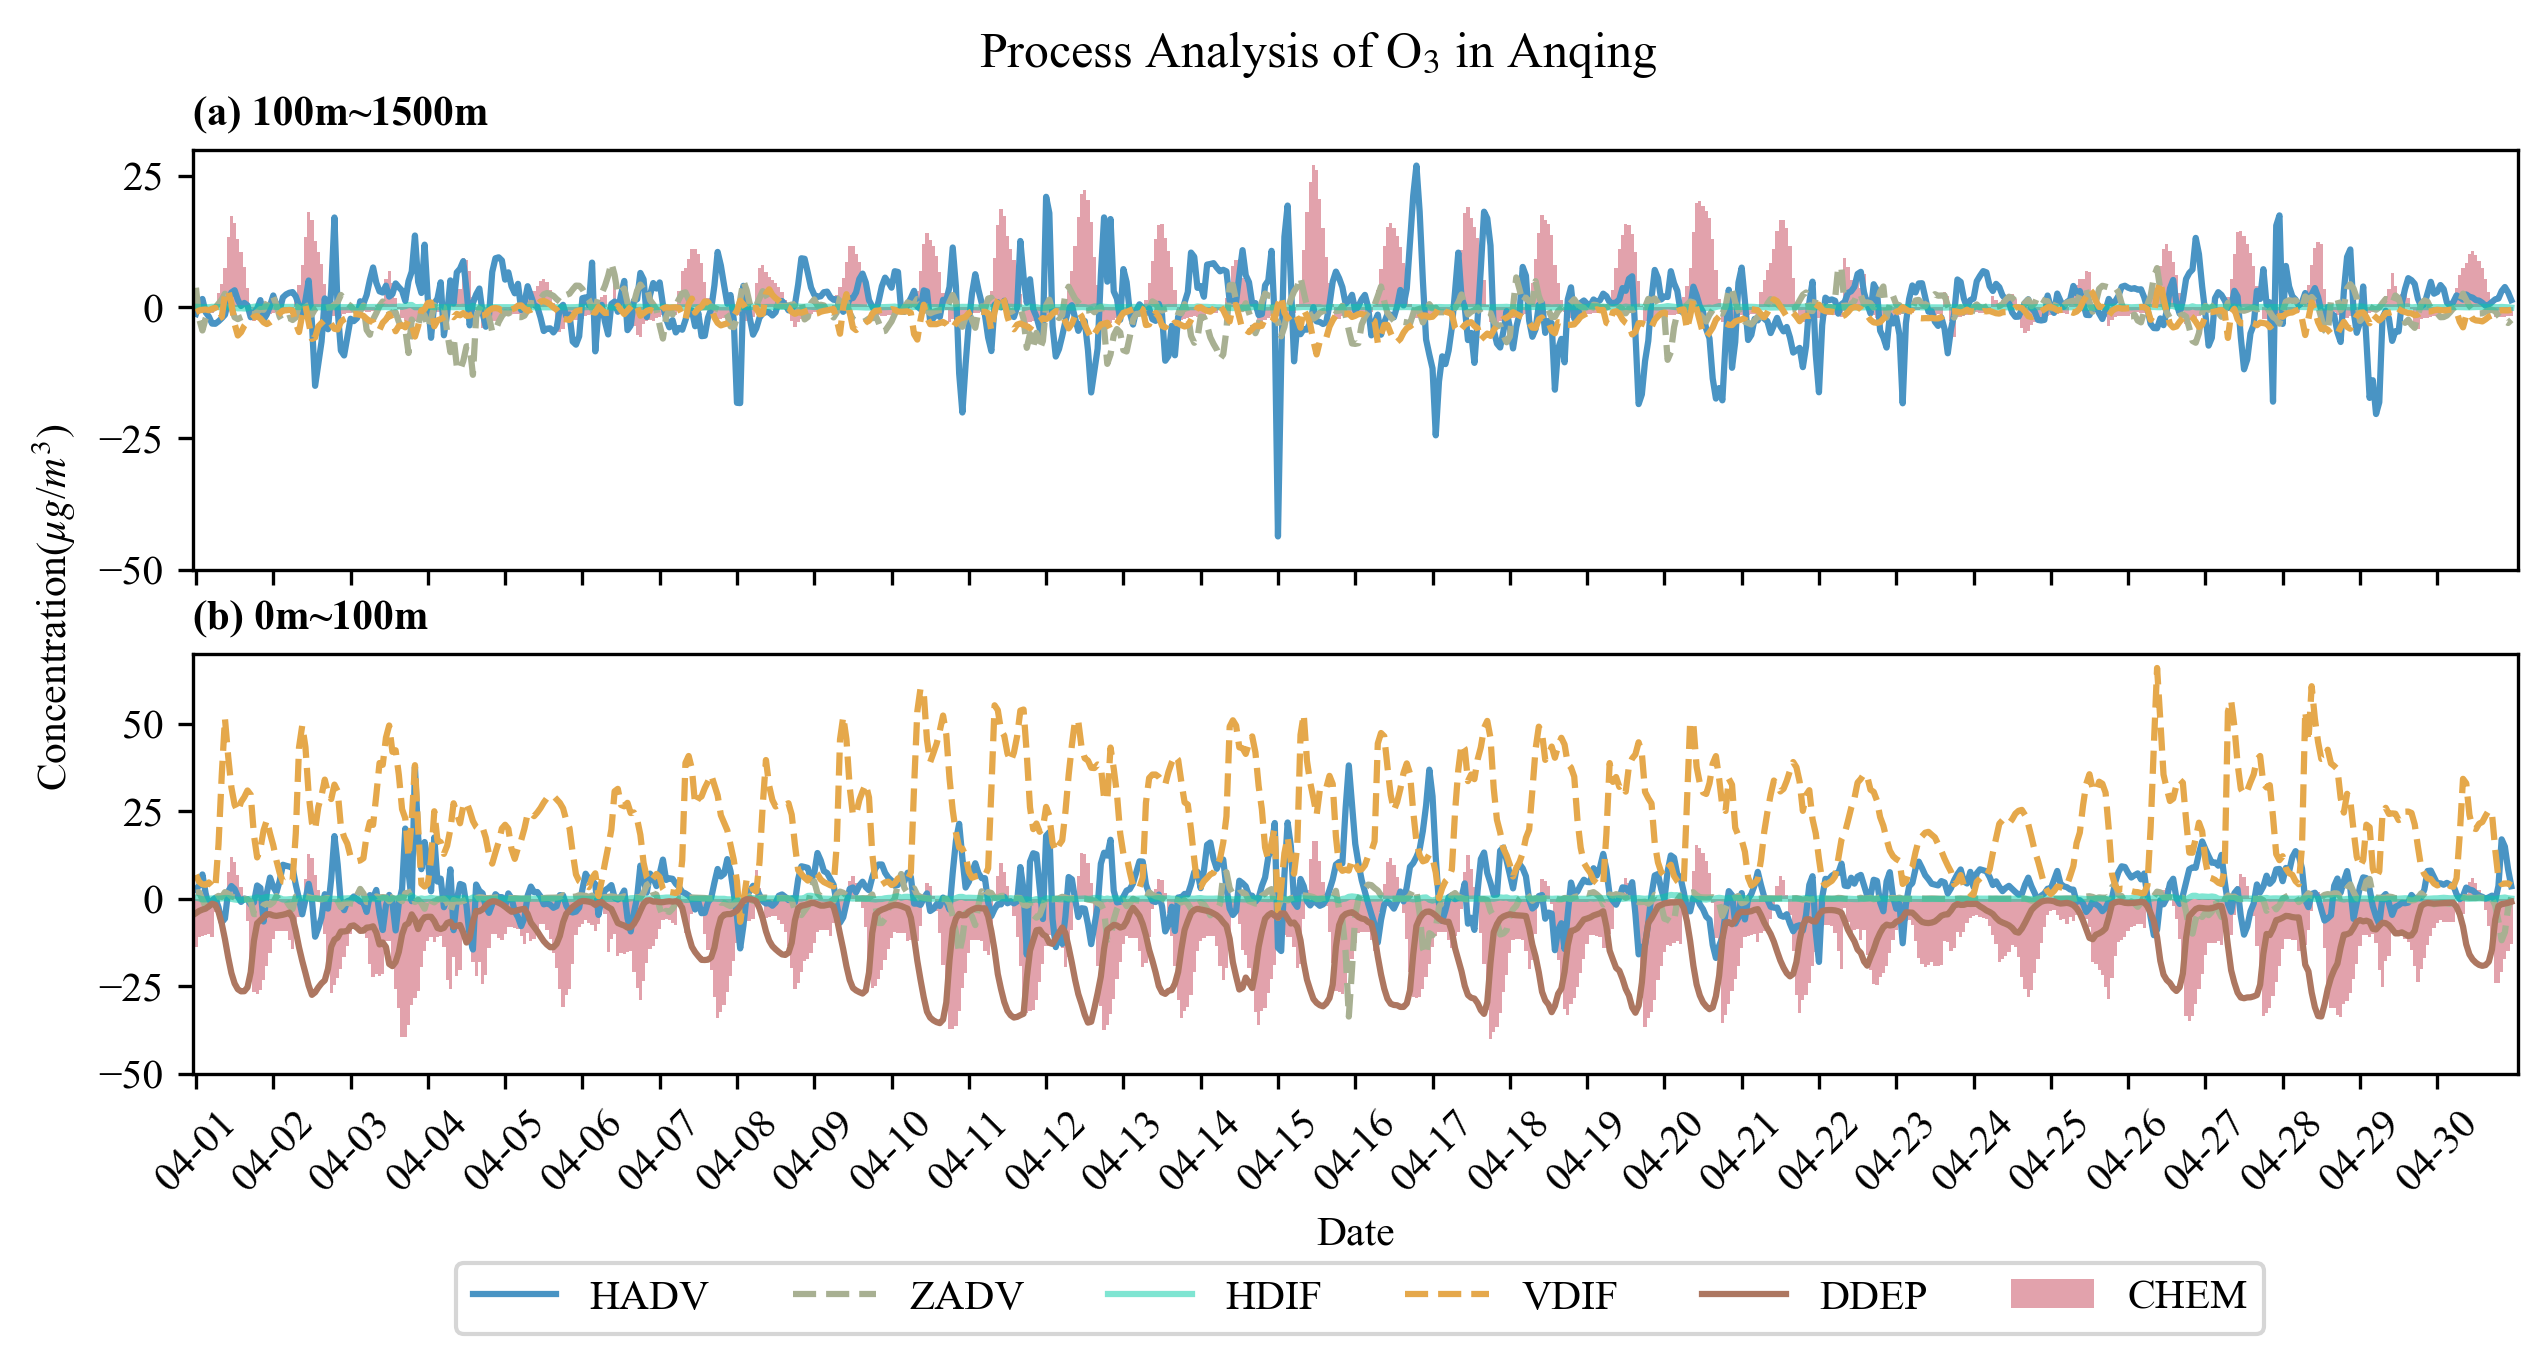

In [42]:
color_hadv = '#4994c4'
color_zadv = '#a8b092'
color_hdif = '#00cca6'
color_vdif = '#e5a84b'
color_chem = '#e2a2ac'
color_ddep = '#ad7761'

ts=np.arange(0,720)

fig=plt.figure(figsize=(10,4),dpi=300)
ax=fig.subplots(2,1)

b1=ax[1].plot(ts,hadv_L1,linestyle='-',color=color_hadv,label='HADV')
b2=ax[1].plot(ts,zadv_L1,linestyle='--',color=color_zadv,label='ZADV')
b3=ax[1].plot(ts,hdif_L1,linestyle='-',color=color_hdif,alpha=0.5,label='HDIF')
b4=ax[1].plot(ts,vdif_L1,linestyle='--',color=color_vdif,label='VDIF')
b5=ax[1].bar(ts,chem_L1,width=1,color='#e2a2ac',label='CHEM')
b6=ax[1].plot(ts,ddep_L1,linestyle='-',color=color_ddep,label='DDEP')

b1=ax[0].plot(ts,hadv_L2,linestyle='-',color=color_hadv,label='HADV')
b2=ax[0].plot(ts,zadv_L2,linestyle='--',color=color_zadv,label='ZADV')
b3=ax[0].plot(ts,hdif_L2,linestyle='-',color=color_hdif,alpha=0.5,label='HDIF')
b4=ax[0].plot(ts,vdif_L2,linestyle='--',color=color_vdif,label='VDIF')
b5=ax[0].bar(ts,chem_L2,width=1,color='#e2a2ac',label='CHEM')
# b6=ax[0].plot(ts,ddep_L2,linestyle='-',color=color_ddep,label='DDEP')

ax[1].set_xlabel('Date')
ax[1].set_xticks(np.arange(0,720,24))
ax[1].set_xticklabels(pd.date_range('2023-04-01','2023-04-30',freq='D').strftime('%m-%d'),rotation=45)
ax[1].set_yticks(np.arange(-50,81,25))
ax[1].set_ylim([-50,70])
ax[1].set_xlim([-1,721])
ax[1].set_title('(b) 0m~100m',fontdict={'fontsize':10,'weight':'bold'},loc='left')

ax[0].set_xticks(np.arange(0,720,24))
ax[0].set_xticklabels([])
ax[0].set_yticks(np.arange(-50,51,25))
ax[0].text(x=-0.07,y=-0.5,s='Concentration($\mu$$g$/$m^3$)',rotation=90,transform=ax[0].transAxes)
ax[0].set_ylim([-50,30])
ax[0].set_xlim([-1,721])
ax[0].set_title('(a) 100m~1500m',fontdict={'fontsize':10,'weight':'bold'},loc='left')

ax[1].legend(bbox_to_anchor=(0.9,-0.4),ncol=6)

plt.suptitle('Process Analysis of O$_3$ in Anqing')

plt.show()